In [1]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

%load_ext autoreload
%autoreload 2

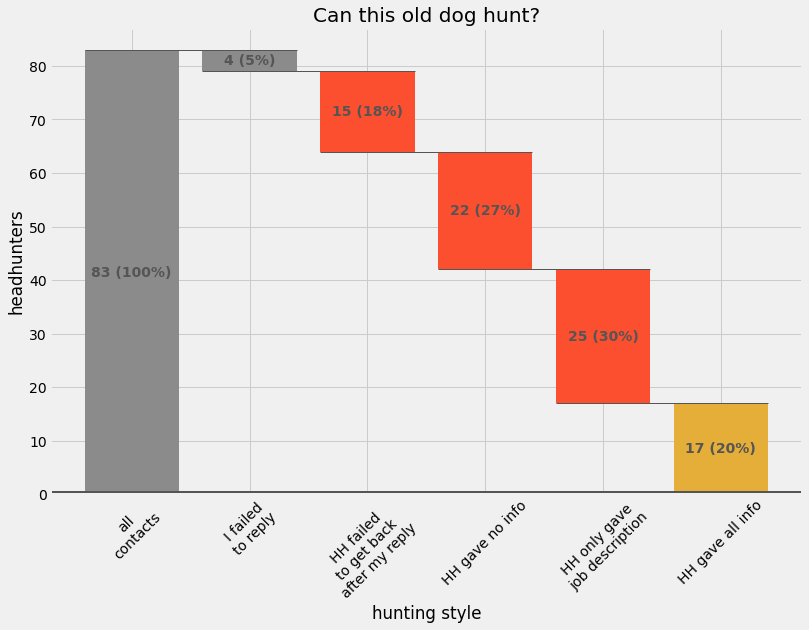

In [2]:
values = np.array([83, -4, -15, -22, -25, -17])
x_label = "hunting style"
y_label = "headhunters"
x_ticklabels = [f"{v:.0f}_muhaha" for v in values]
x_ticklabels = [
    "all\ncontacts",
    "I failed\nto reply",
    "HH failed\nto get back\nafter my reply",
    "HH gave no info",
    "HH only gave\njob description",
    "HH gave all info",
    ]
title = "Can this old dog hunt?"
width = 0.8


heights = abs(values)
bottoms = []
cumsum=0
for v in values: 
    bottoms.append(min(cumsum, cumsum + v))
    cumsum += v
bottoms = np.array(bottoms)
# colors = ['#77AB43' if v > 0 else '#FF2700' for v in values]
# colors = ['#8b8b8b' if v > 0 else '#e5ae38' for v in values]
# colors = ['#8b8b8b', '#30a2da', '#e5ae38', '#e5ae38', '#e5ae38', '#e5ae38']
# colors = ['#8b8b8b', '#e5ae38', '#fc4f30', '#fc4f30', '#fc4f30', '#6d904f']
colors = ['#8b8b8b', '#8b8b8b', '#fc4f30', '#fc4f30', '#fc4f30', '#e5ae38']

percentages = [h / heights[0] for h in heights]

h_line_xs = [[i - width / 2, i + 1 + width / 2] for i in range(values.shape[0])]
h_line_ys = [[csv, csv] for csv in np.cumsum(values)]


fig, ax = plt.subplots(figsize=(12,8))
ax.bar(
    np.arange(len(values)),
    height=heights,
    bottom=bottoms,
    color=colors,
    width=width)
label = [f"{heights[i]:.0f} ({percentages[i]:.0%})" for i in range(values.shape[0])]
for i in range(values.shape[0]):
    text = label[i]
    label_x = i
    label_y = bottoms[i] + abs(heights[i]) / 2
    ax.text(
        label_x,
        label_y,
        s=text,
        ha='center',
        va='center',
        fontsize=14,
        fontweight='bold',
        color='#555555',
        )
ax.axhline(0,color='#555555',linewidth=6)
for i in range(values.shape[0] - 1):
    ax.plot(
        h_line_xs[i],
        h_line_ys[i],
        color='#555555',
        linewidth=1,
    )

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_xticks(np.arange(values.shape[0]))
ax.set_xticklabels(
    x_ticklabels,
    rotation=45)
ax.set_title(title)

plt.savefig("../../test.png", bbox_inches = 'tight', dpi = 300)
plt.show()